**Contributions**
Tabito - Data collection and cleaning, video editing

Aaron - EDA

Karen - Linear Regression

Richard - Logistic Regression

Nathan - SVM

Steven - XG Boost





**Features in the Dataset**

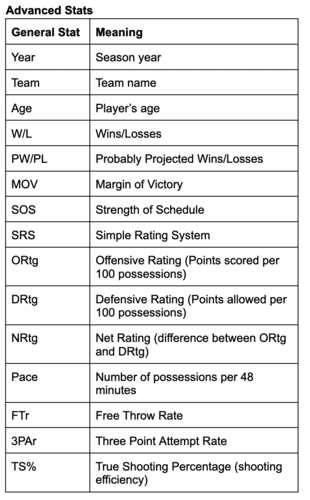
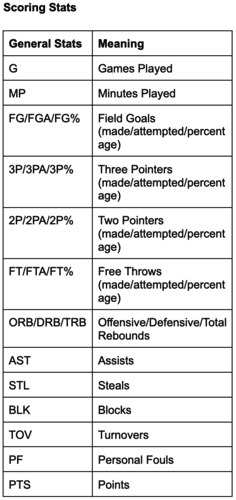

**GOALS**

We wanted to predict this year's entire NBA Playoffs through machine learning techniques using this years regular season team statistics up to the due date of the project. The dataset we used was from Basketball References We will be training and testing our models based on team statistics from seasons 1980 to 2024.

** Techniques Used **

- ANOVA
  - Used to determine if there were statistically significant differences between playoff and non-playoff teams across various metrics. This statistic had the strongest relationship with playoff status
- Tukey HSD
  - After ANOVA showed significant differences, Tukey's HSD tests were used to compare means between playoff and non-playoff teams. This analysis quantified the exact differences between groups.
- Box Plots
  - Box plots were used to visually represented the distribution of metrics between playoff and non-playoff teams. It helped us visualize some key differences between groups.
- Linear Regression Model
  - Linear regression was added to predict continuous outcomes of wins based on input features. The model helped identify which metrics had the strongest linear relationship with team success.
- SVM Model
  - This classification was used because it was very effective in non-linear relationships. This was good because it was non-linear whichreduces overfitting.
- Extreme Gradient Boosting
  - Used to create decision trees that can represent non-linear relationships between features and playoff status.
- Logistic Regression
  - Our main method of predicting NBA Championships was logistic regression. We could use it to predict binary outcomes of playoff qualifications. Using this model gave interpretable results through feature coefficients while handling classifications of playoff predictions.

**Data Collection and Data cleaning**

Copied and pasted all the tables of advanced and traditional team statistics from https://www.basketball-reference.com/leagues/NBA_2024.html for each respective year into separate datasets for advanced and traditional team statistics into google sheets and downloading them as csv files. We then combined them into one dataset as seen below and ranked them. We ranked them in order to reduce bias. For example one of the data points within the dataset is called 3PA, or 3 point attempts has drastically increased in modern NBA, but was very low in the 1980s, in order to reduce biases like these, we decided to rank the teams by statistical ranks and year.

In [ ]:
#data cleaning
import pandas as pd

advanced_stats_df = pd.read_csv('/content/drive/MyDrive/CS105/NBA_RANKED_ADV_AS_OF_12_8_24.csv')
traditional_stats_df = pd.read_csv('/content/drive/MyDrive/CS105/NBA_RANKED_TRAD_AS_OF_12_8_24.csv')
print("Advanced Stats Columns:", advanced_stats_df.columns)
print("Traditional Stats Columns:", traditional_stats_df.columns)
advanced_stats_df.columns = advanced_stats_df.columns.str.strip().str.lower()
traditional_stats_df.columns = traditional_stats_df.columns.str.strip().str.lower()

if 'year' in advanced_stats_df.columns and 'team' in advanced_stats_df.columns and \
   'year' in traditional_stats_df.columns and 'team' in traditional_stats_df.columns:
    advanced_stats_df = advanced_stats_df.sort_values(by=['year', 'team']).reset_index(drop=True)
    traditional_stats_df = traditional_stats_df.sort_values(by=['year', 'team']).reset_index(drop=True)

    combined_df = pd.merge(advanced_stats_df, traditional_stats_df, on=['year', 'team'], how='inner')

    combined_df.to_csv('combined_current_stats.csv', index=False)
    print("Merge successful. Combined stats saved to 'combined_stats.csv'")
else:
    print("Error: One or both DataFrames are missing 'year' or 'team' columns.")

combined_df = pd.read_csv('combined_current_stats.csv')
print("Original DataFrame:")
print(combined_df.head())
columns_to_rank = [col for col in combined_df.columns if col not in ['year', 'team']]
ranked_df = combined_df.copy()
ranked_df[columns_to_rank] = combined_df.groupby('year')[columns_to_rank].rank(ascending=False)
ranked_df.to_csv('ranked_current_combined_stats.csv', index=False)
print("Ranked DataFrame:")
print(ranked_df.head())

Advanced Stats Columns: Index(['Year', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS',
       'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Unnamed: 17',
       'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'Unnamed: 22', 'eFG%.1', 'TOV%.1',
       'DRB%', 'FT/FGA.1', 'Unnamed: 27', 'Arena', 'Attend.', 'Attend./G'],
      dtype='object')
Traditional Stats Columns: Index(['Year', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Merge successful. Combined stats saved to 'combined_stats.csv'
Original DataFrame:
   year               team   age   w   l  pw  pl   mov   sos   srs  ...  \
0  2025      Atlanta Hawks  24.7  13  12  10  15 -2.76 -1.02 -3.78  ...   
1  2025     Boston Celtics  28.9  19   5  18   6  9.42 -0.89  8.53  ...   
2  2025      Brooklyn Nets  26.1  10  14   9  15 -3.75  1.33 -2.42  ...   
3  2025  Charlotte Hornets  25

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


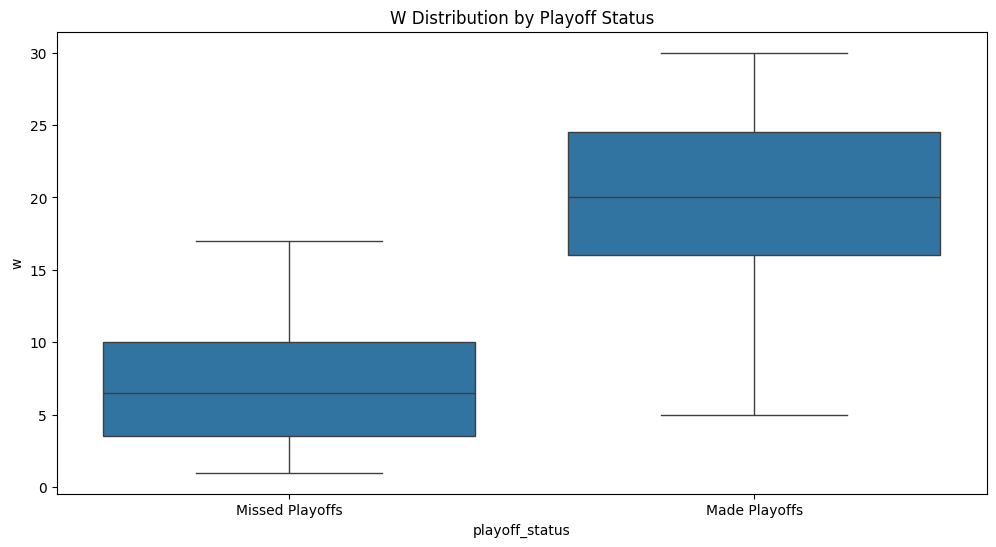


ANOVA Results for w:
F-statistic: 2042.68310807478
P-value: 3.0284925676572054e-265
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   13.119   0.0 12.5495 13.6884   True
---------------------------------------------------


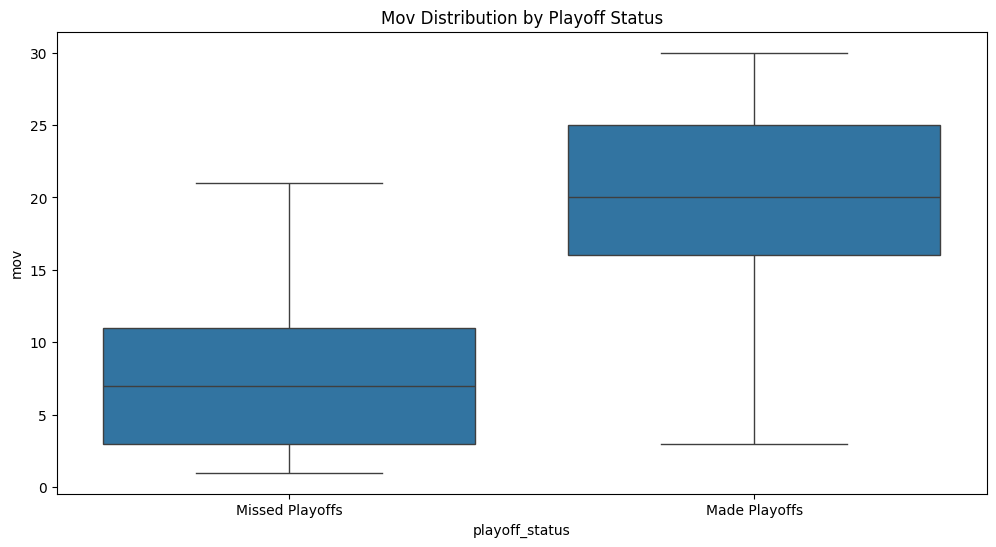


ANOVA Results for mov:
F-statistic: 1616.0924253474523
P-value: 1.520941451354403e-227
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  12.5215   0.0 11.9104 13.1325   True
---------------------------------------------------


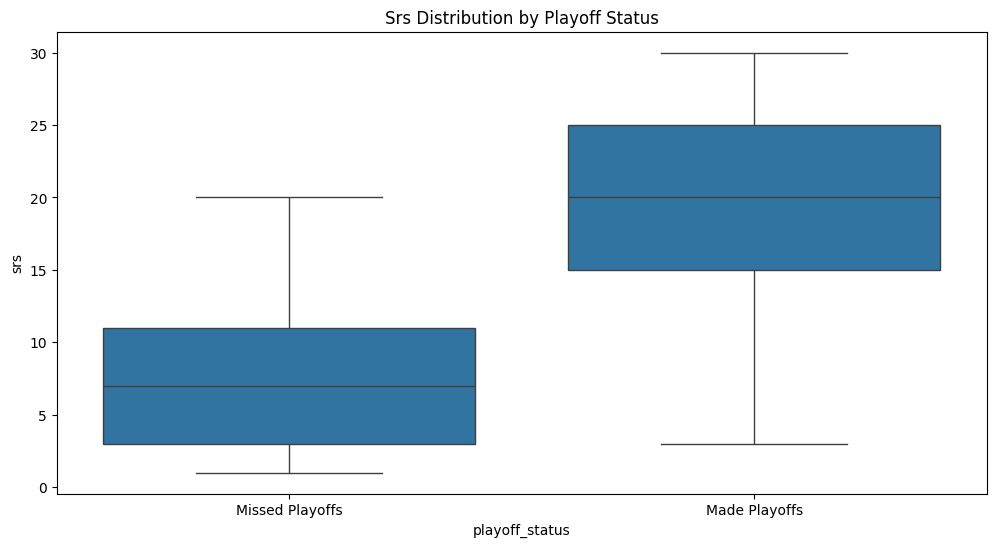


ANOVA Results for srs:
F-statistic: 1511.7837297946426
P-value: 1.802331018830642e-217
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   12.337   0.0 11.7145 12.9595   True
---------------------------------------------------


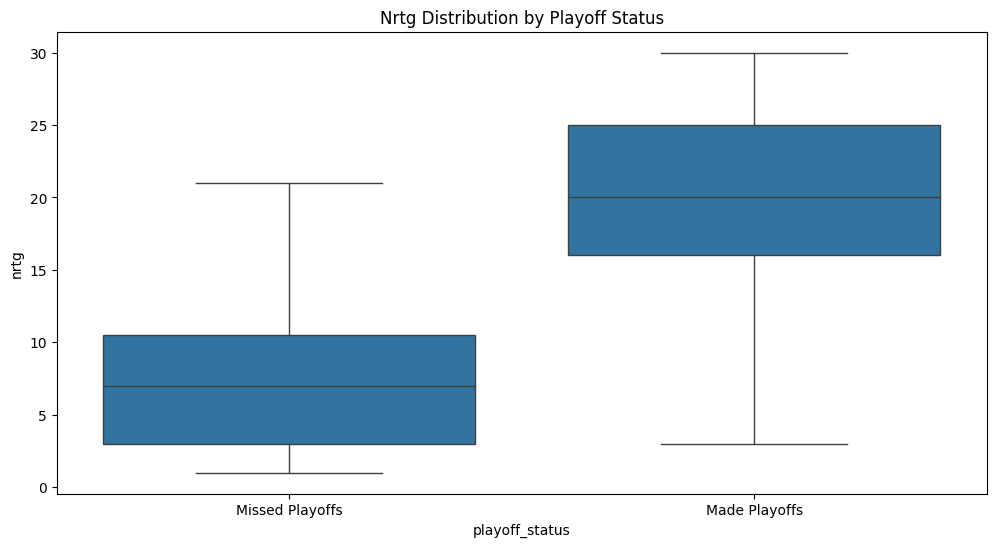


ANOVA Results for nrtg:
F-statistic: 1629.0728106657346
P-value: 9.000544976959011e-229
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  12.5394   0.0 11.9299 13.1489   True
---------------------------------------------------


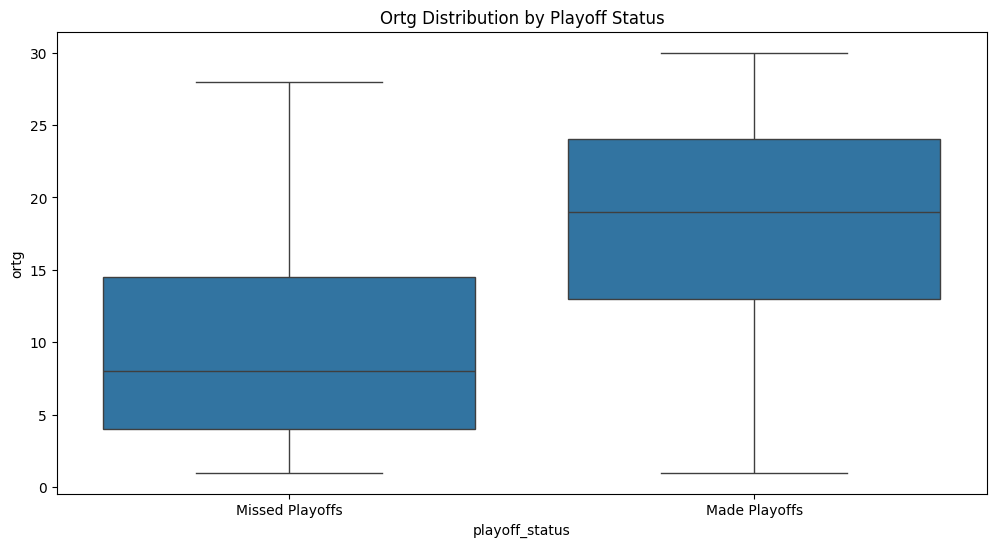


ANOVA Results for ortg:
F-statistic: 487.821377532175
P-value: 1.525106794278771e-91
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
     0      1   8.8303   0.0 8.046 9.6147   True
------------------------------------------------


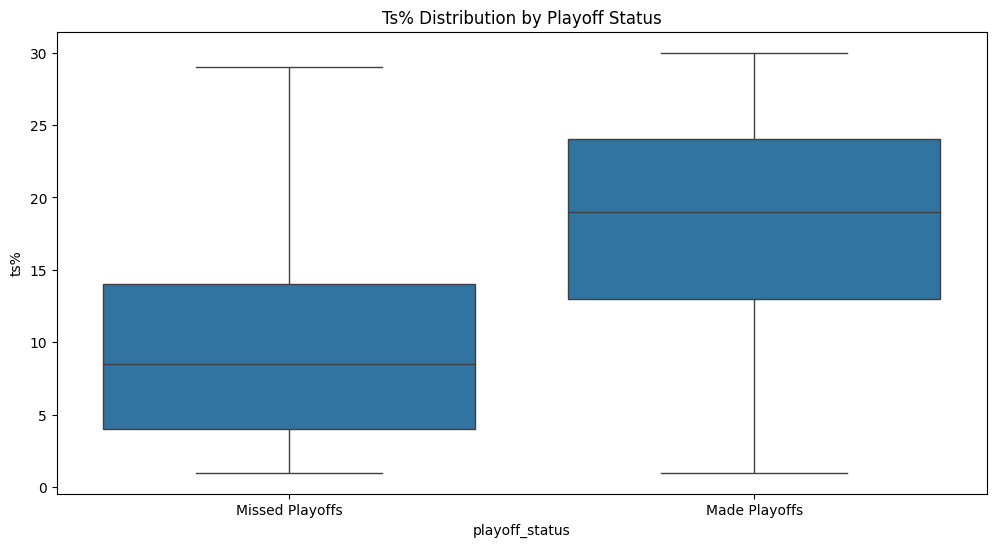


ANOVA Results for ts%:
F-statistic: 436.94061471080386
P-value: 1.8545855883620386e-83
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
     0      1   8.4777   0.0 7.682 9.2734   True
------------------------------------------------


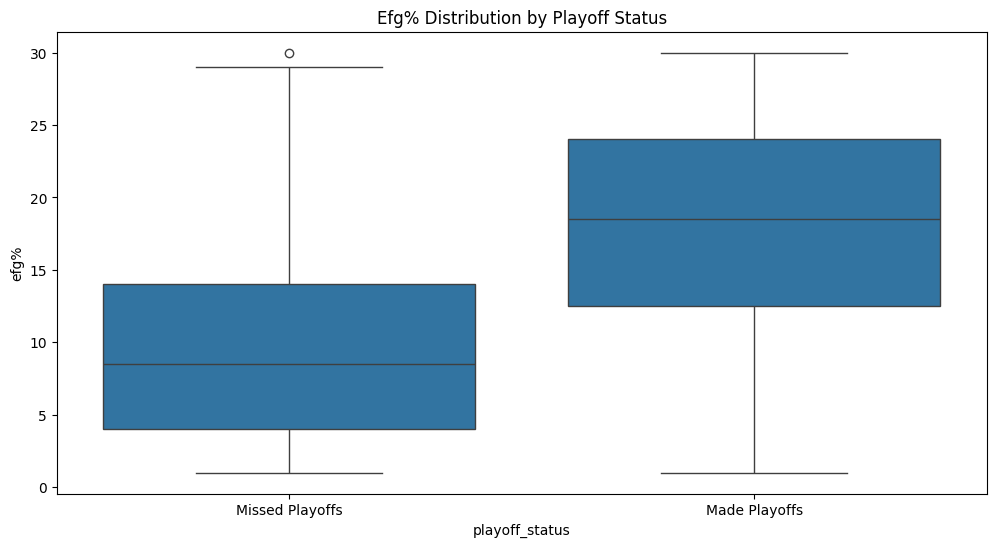


ANOVA Results for efg%:
F-statistic: 398.46580439793655
P-value: 3.5222651665802994e-77
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   8.1904   0.0 7.3854 8.9953   True
-------------------------------------------------


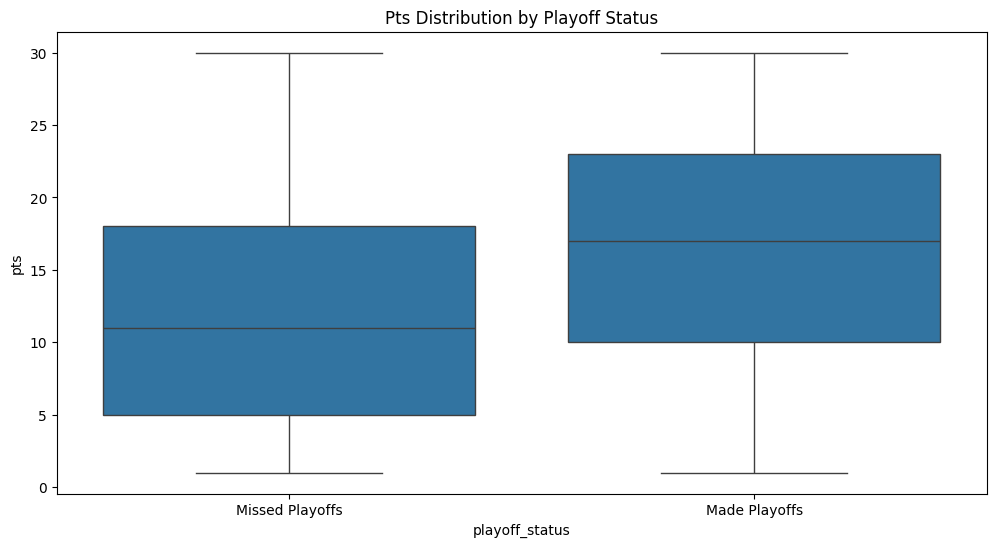


ANOVA Results for pts:
F-statistic: 122.77117720081743
P-value: 2.7743458961576552e-27
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   4.9841   0.0 4.1016 5.8666   True
-------------------------------------------------


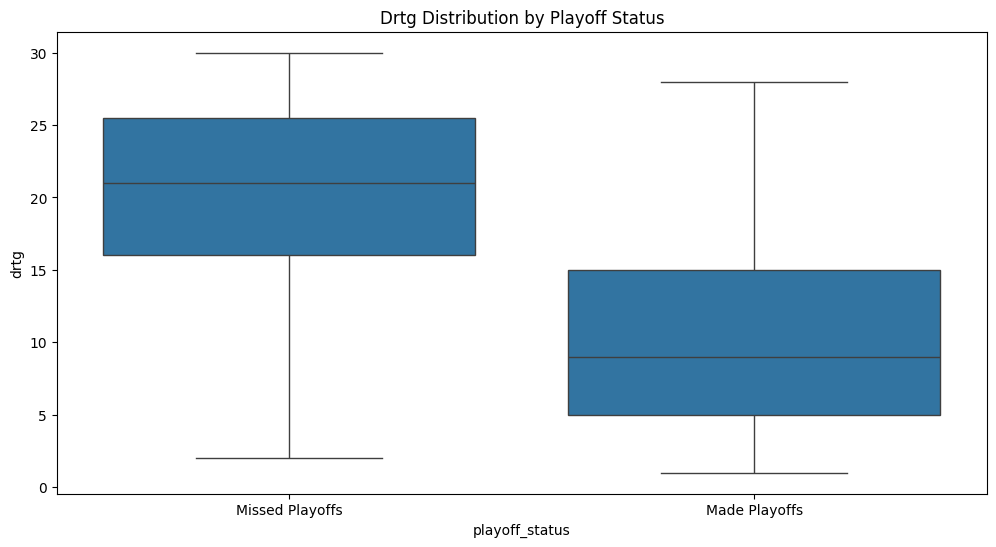


ANOVA Results for drtg:
F-statistic: 740.6288482670509
P-value: 1.7661713542270452e-128
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1 -10.1658   0.0 -10.8986 -9.433   True
---------------------------------------------------


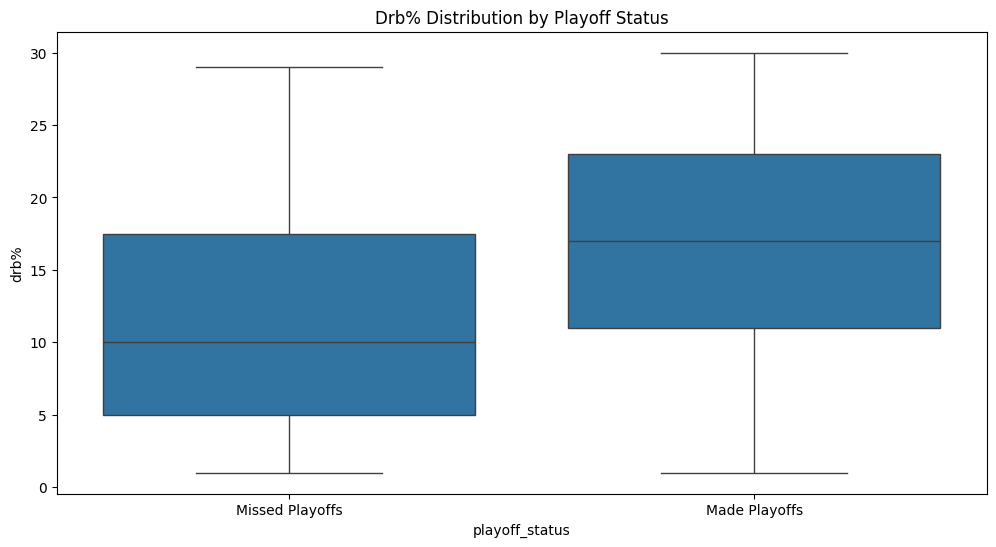


ANOVA Results for drb%:
F-statistic: 117.42293262233498
P-value: 3.24685716032327e-26
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     0      1   4.8812   0.0 3.9975 5.765   True
------------------------------------------------


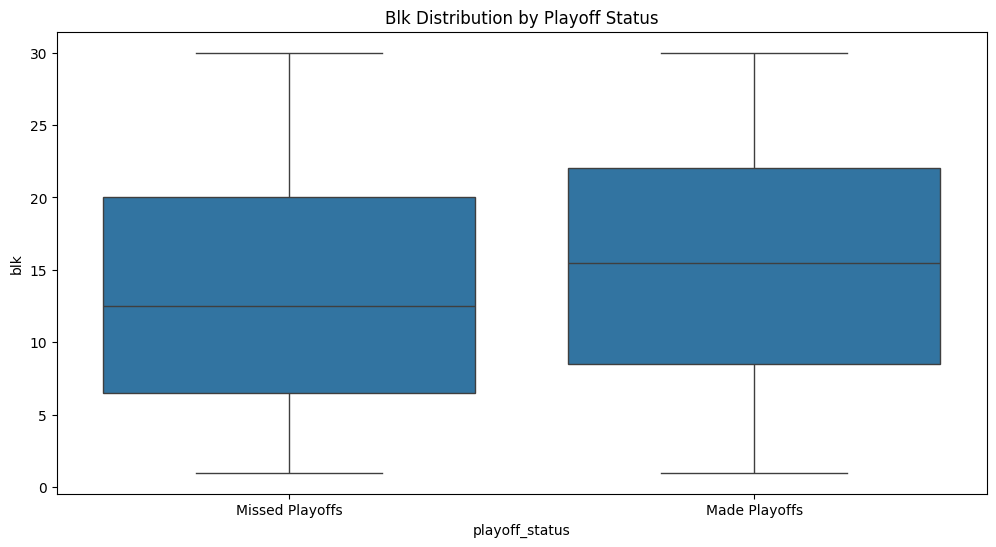


ANOVA Results for blk:
F-statistic: 21.359938824517
P-value: 4.200326091247384e-06
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     0      1   2.1565   0.0 1.2411 3.072   True
------------------------------------------------


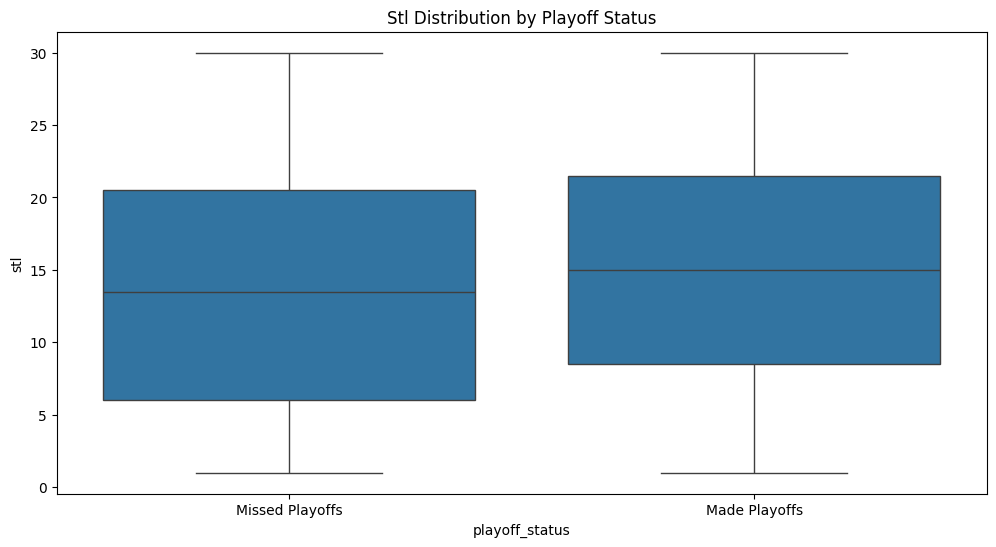


ANOVA Results for stl:
F-statistic: 9.501318482333701
P-value: 0.0020981351683443
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   1.4448 0.0021 0.5252 2.3643   True
--------------------------------------------------


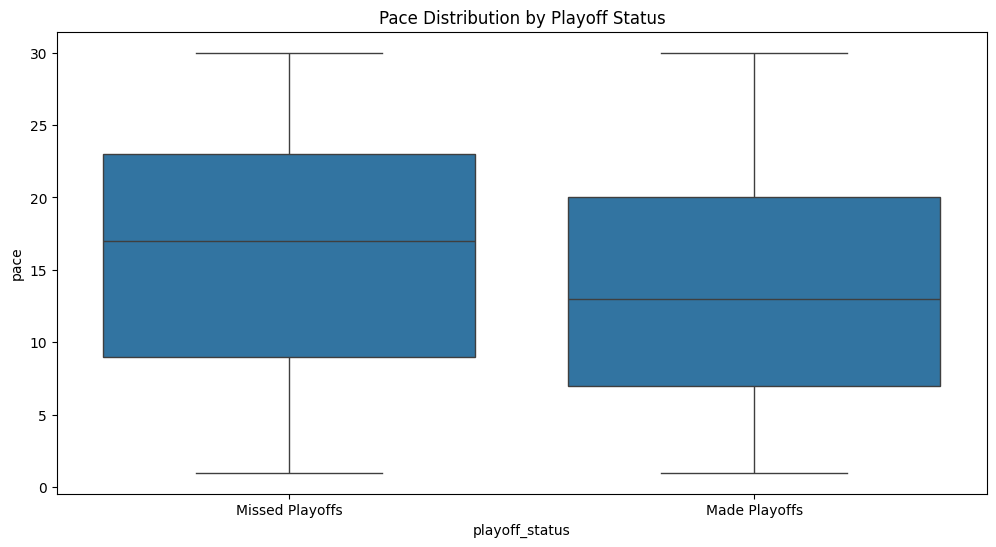


ANOVA Results for pace:
F-statistic: 37.2553498842796
P-value: 1.38009428720047e-09
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -2.8341   0.0 -3.7451 -1.9232   True
---------------------------------------------------


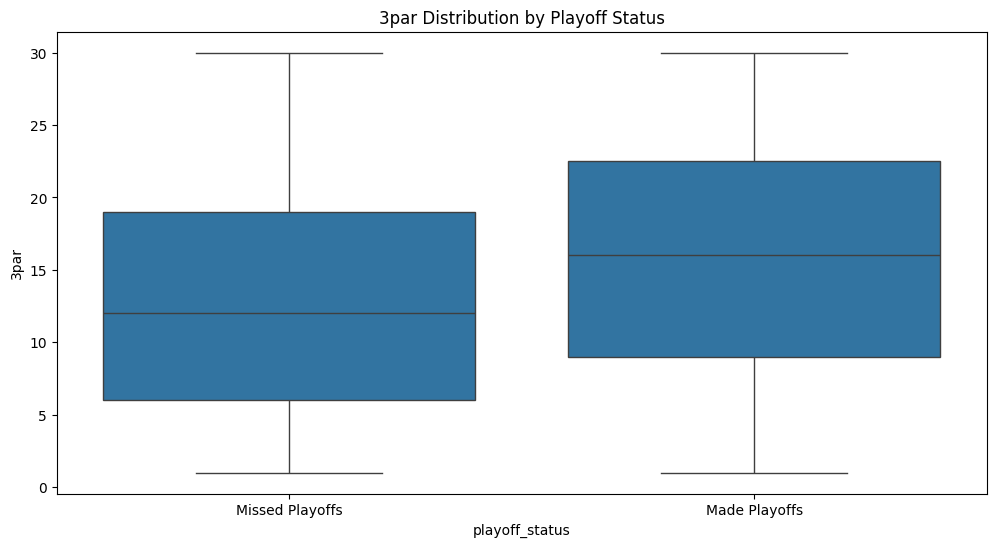


ANOVA Results for 3par:
F-statistic: 36.22931215389473
P-value: 2.301188301953918e-09
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
     0      1   2.7965   0.0 1.885 3.708   True
-----------------------------------------------


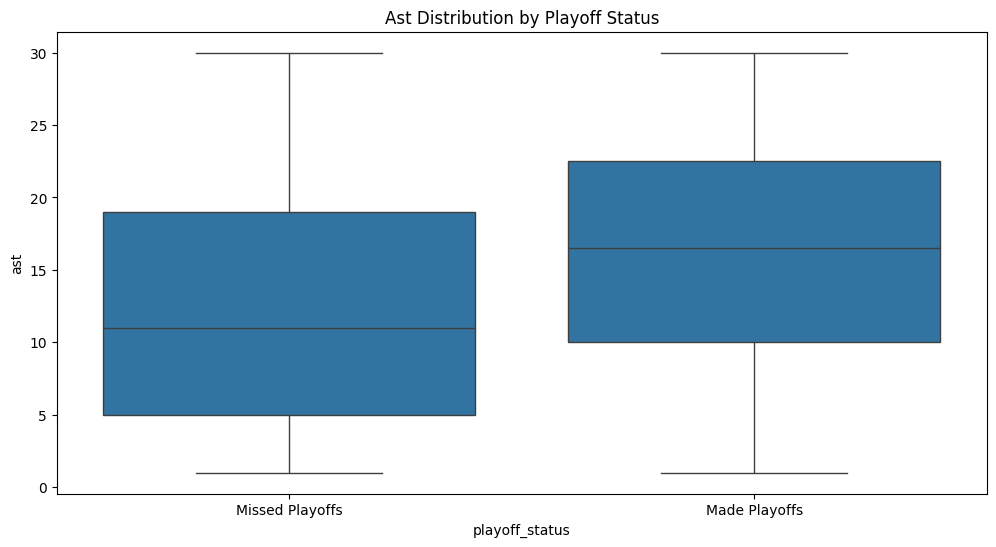


ANOVA Results for ast:
F-statistic: 72.62428563163925
P-value: 4.450391993452787e-17
There is a significant difference between playoff and non-playoff teams.

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   3.9033   0.0 3.0047 4.8019   True
-------------------------------------------------


In [ ]:
"""
ANOVA, Tukey HSD tests, Box Plots.

Results should conclude that Wins and MOV are strong predictors, while ORTC and SRS are weakest predictors

"""

#below are libraries used, no need to include this if theres already a code block with these libraries anyways


import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

#Can change depending on what the actual file name is, as long as its ranked combined stats cleaned.
df = pd.read_csv("/content/drive/MyDrive/CS105/ranked_combined_stats_cleaned.csv")

def playoffs(df):
    df_copy = df.copy()
    df_copy['playoff_status'] = 0

    for year in df_copy['year'].unique():
        for conf in df_copy['conference'].unique():
            mask = (df_copy['year'] == year) & (df_copy['conference'] == conf)
            conf_teams = df_copy[mask]
            playoff_indices = conf_teams.nlargest(8, 'w').index
            df_copy.loc[playoff_indices, 'playoff_status'] = 1

    return df_copy

def MS_anova(df, stats_list):
    df_analyzed = playoffs(df)
    results = {}

    for stat in stats_list:
        if stat in df_analyzed.columns:
            grouped_data = [group[stat].values for name, group in df_analyzed.groupby('playoff_status')]
            f_statistic, p_value = stats.f_oneway(*grouped_data)

            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df_analyzed, x='playoff_status', y=stat)
            plt.xticks([0, 1], ['Missed Playoffs', 'Made Playoffs'])
            plt.title(f'{stat.capitalize()} Distribution by Playoff Status')
            plt.show()
            print(f"\nANOVA Results for {stat}:")
            print(f"F-statistic: {f_statistic}")
            print(f"P-value: {p_value}")

            if p_value < 0.05:
                print("There is a significant difference between playoff and non-playoff teams.")
                tukey_results = pairwise_tukeyhsd(df_analyzed[stat], df_analyzed['playoff_status'])
                print("\nTukey's HSD Results:")
                print(tukey_results)
            else:
                print("No significant difference between playoff and non-playoff teams.")

stats_list = [
    # Key Performance
    'w', 'mov', 'srs', 'nrtg',
    # Offense
    'ortg', 'ts%', 'efg%', 'pts',
    # Defense
    'drtg', 'drb%', 'blk', 'stl',
    # Style
    'pace', '3par', 'ast'
]
MS_anova(df, stats_list)

**EDA**

Explanation - Based on the data shown, we can see that there are significant relationships between Wins and Margin of Victory. We can see this from the top two box plots, and their ANOVA tests.

Wins:
With a large F-statistic and a P-Value of essentially zero, we can conclude that there is clear statistically significant differences in wins between playoff and non-playoff teams.
Because the ANOVA test indicated that there is a significant relationship, Tukey HSD tests were used to compare the two groups
As shown in Tukey HSD, the mean difference is about 13 wins, meaning playoff teams win about 13 more games on average compared to non-playoff teams.
Therefore, we will reject the null hypothesis that Wins and Playoff teams have no relationship.

Margin of Victory (MOV)
MOV shows to be the 2nd most influencial metric, with a high F-Statistic and extremely small P-value. This shows that there is a clear statistical difference in MOV between playoff and non-playoff teams.
This ANOVA test shows significance, so a Tukey HSD test was used.
The Tukey HSD test shows that playoff teams have a Margin of Victory of about 12.5 points higher than non-playoff teams.
The confidence interval doesn't include zero, confirming the significance. Our null hypothesis is therefore rejected.


Results:
The ANOVA and Tukey HSD tests are ordered from most significant to least significant. This will greatly help in deciding which metrics to use in our championship predictions.

Based on ANOVA and Tukey HSD, there are significant relationships between playoff team status and both Wins and Margin of Victory (MOV). The ANOVA test results for Wins demonstrate a clear statistical significance, with a large F-statistic and a P-value effectively at zero, indicating substantial differences between playoff and non-playoff teams. The subsequent Tukey HSD test revealed that playoff teams average approximately 13 more wins compared to non-playoff teams, definitively rejecting the null hypothesis of no relationship between Wins and playoff status. Similarly, MOV emerged as the second most influential metric, showing strong statistical significance through its high F-statistic and extremely small P-value. The Tukey HSD analysis for MOV indicated that playoff teams maintain a margin of victory approximately 12.5 points higher than non-playoff teams, with a confidence interval that excludes zero, further confirming its significance and leading to the rejection of the null hypothesis. These ANOVA and Tukey HSD tests, arranged from most to least significant, which helps identifying the most relevant metrics for championship predictions.



**Linear regression model**

We first start off by removing the % and . from our data and we also renamed our columns in order to not create any issues when calling the variables. We also remove the outliers in order to normalize our data but there was only 1 row removed. Next we are splitting our data into x and y so that x has all the variables except team name and wins and y holds only Wins. We then create our first linear regression model utilizing all of our variables as predictors. We then run the model that represents 80% of our data which then we are able to get the R^2 is 0.9998 which means that our model represents 99.98% of our data. that however is too high so we run VIF which shows if any variables contributing to the amount of wins is too high and they are too highly correlated. We then create a second model where we agiain split our model into 80-20 including only the variables that have no multicollinearity and we get an r^2 of 0.6167. This means that the variables, 'year','age','sos','pace','tov_perc1','drb_perc','ft_fga1','mp','3p_perc','ft_perc','ast','stl','blk','pf' have a 61.67% of accurately predicting the amount of wins a team will have given the statistics of the variables. We then run a cross validation that is able to iterate through the data and get us a better model that will represent more of the data and we get a value of 0.6412 which represents 64.12% of the data. So we can conclude that the model is able to accurately predict the number of wins that the team, given the variables 'year','age','sos','pace','tov_perc1','drb_perc','ft_fga1','mp','3p_perc','ft_perc','ast','stl','blk','pf’, gets. Which means that the teams with the higher amount of wins is able to advance other the playoffs.

   year                 team   age     w     l    pw    pl   mov   sos   srs  \
0  1980       Atlanta Hawks*  15.0   6.0  17.0   7.5  15.5   8.0  15.0   7.0   
1  1980      Boston Celtics*   4.5   1.0  22.0   1.0  22.0   1.0  20.5   1.0   
2  1980        Chicago Bulls  17.0  18.5   4.5  16.5   6.5  17.0  13.0  17.0   
3  1980  Cleveland Cavaliers   3.0  14.5   8.5   9.0  14.0   9.0  12.0   9.0   
4  1980       Denver Nuggets   6.0  18.5   4.5  18.5   4.5  20.0   4.5  20.0   

   ...   ft%   orb   drb   trb   ast   stl   blk   tov    pf   pts  
0  ...  10.0   4.0  15.0   5.0  20.0  10.0   5.0  16.5   1.0  19.0  
1  ...   4.5  13.0   9.5  11.0   7.5   6.0  21.0  11.5  10.5   5.0  
2  ...   4.5  19.0   8.0  19.0  10.0  18.5  13.0   4.0   4.0  17.0  
3  ...   8.5   7.0  17.0  10.0  13.0  15.0  17.5  22.0  13.5   3.0  
4  ...  21.0   6.0   6.0   3.0  15.0  16.5  12.0  13.0  16.0  13.5  

[5 rows x 50 columns]
   year                 team   age     w     l    pw    pl   mov   sos   srs  \
0 

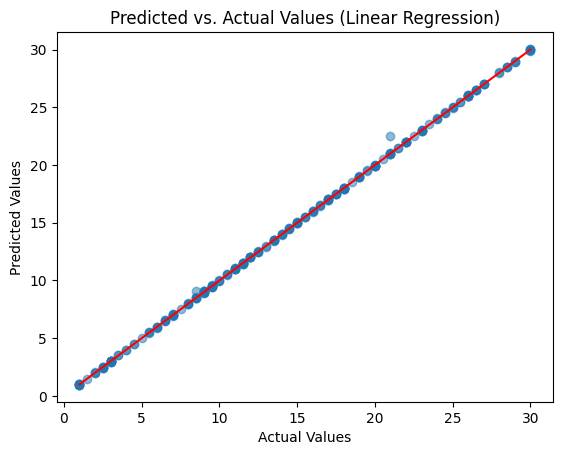

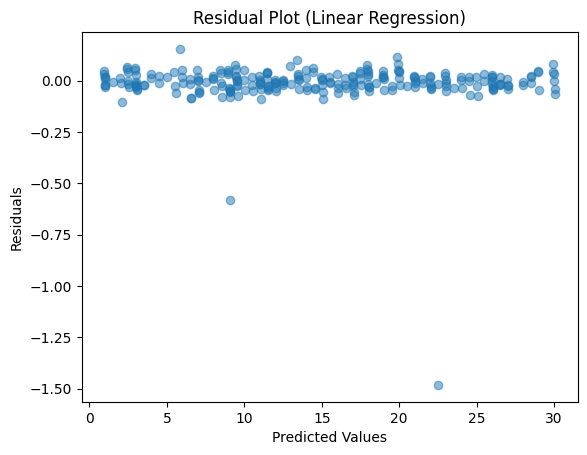

      Feature  Coefficient
0        year    -0.000180
1         age    -0.000833
2           l    -0.997079
3          pw     1.049070
4          pl     1.006535
5         mov    -0.017606
6         sos    -0.002063
7         srs     0.011370
8        ortg    -0.001280
9        drtg     0.001176
10       nrtg    -0.033793
11       pace    -0.001166
12        ftr     0.004042
13       3par    -0.003400
14    ts_perc     0.001647
15   efg_perc    -0.001869
16   tov_perc     0.000721
17   orb_perc     0.000556
18     ft_fga     0.005920
19  efg_perc1    -0.000675
20  tov_perc1     0.000975
21   drb_perc    -0.001605
22    ft_fga1     0.000239
23          g    -0.015577
24         mp    -0.001251
25         fg    -0.002716
26        fga     0.002026
27    fg_perc     0.000533
28         3p    -0.001555
29        3pa     0.005634
30    3p_perc     0.000499
31         2p     0.002733
32        2pa    -0.000357
33    2p_perc    -0.003872
34         ft    -0.005550
35        fta    -0.003443
3

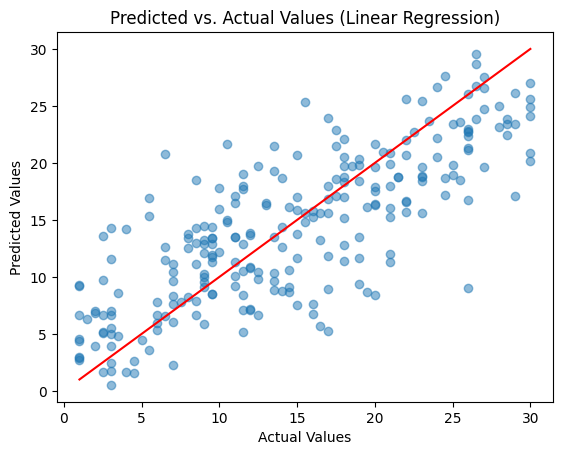

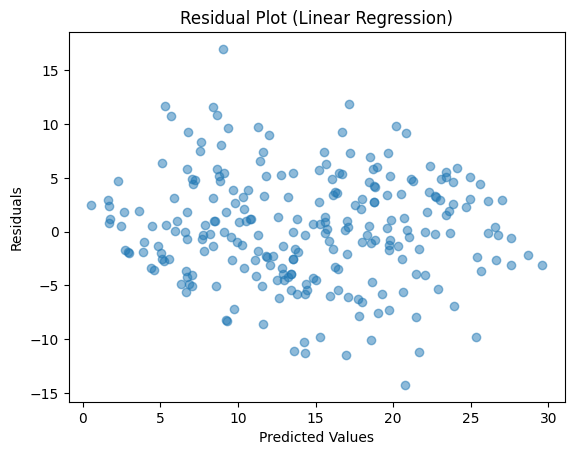

      Feature           VIF
0       const  30170.318526
1        year      1.250416
2         age      1.475319
3         sos      1.214487
4        pace      1.793184
5   tov_perc1      3.473279
6    drb_perc      1.283823
7     ft_fga1      5.152185
8          mp      1.052762
9     3p_perc      1.220291
10    ft_perc      1.131628
11        ast      1.410656
12        stl      3.437715
13        blk      1.093595
14         pf      5.057652
Cross-validation MSE scores: [-23.58690614 -18.83238886 -31.02500347 -27.59902037 -30.9335306 ]
Mean MSE: -26.39536988643627
Standard deviation of MSE: 4.659685288251509
Cross-validation MSE: -25.57905595466341
Test set MSE: 24.826534911210384
Training Set R²: 0.6412096376242284
Training Set MSE: 24.520706700564766


In [ ]:
#linear regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from numpy import mean
from numpy import absolute
from numpy import sqrt


raw=pd.read_csv("/content/drive/MyDrive/CS105/ranked_combined_stats.csv")
data = pd.DataFrame(raw)
print(raw.head())

#Start cleaning data by renaming the variables into all _ and removing empty columns
#removing empty columns
data= raw.dropna(axis=1, how='all')
print(data.head())

#renaming to remove all % and .
data = data.rename(columns={'ts%': 'ts_perc'})
data = data.rename(columns={'efg%': 'efg_perc'})
data = data.rename(columns={'tov%': 'tov_perc'})
data = data.rename(columns={'orb%': 'orb_perc'})
data = data.rename(columns={'ft/fga': 'ft_fga'})
data = data.rename(columns={'efg%.1': 'efg_perc1'})
data = data.rename(columns={'tov%.1': 'tov_perc1'})
data = data.rename(columns={'drb%': 'drb_perc'})
data = data.rename(columns={'ft/fga.1': 'ft_fga1'})
data = data.rename(columns={'fg%': 'fg_perc'})
data = data.rename(columns={'3p%': '3p_perc'})
data = data.rename(columns={'2p%': '2p_perc'})
data = data.rename(columns={'ft%': 'ft_perc'})
print(data.head())
print(data.columns)

#Cleaning data more and getting it ready to train
# converts percentages to floats
percentage_columns = ['ts_perc', 'tov_perc', 'efg_perc']
data[percentage_columns] = data[percentage_columns].astype(float)

#year is now int
data['year'] = data['year'].astype(int)
print(data.head())

# removing outliers out of the data in order to create more unity throught z-scores
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data = data[(np.abs(zscore(data[numeric_columns])) < 3).all(axis=1)]
print(data.head())
print(data.columns)

#Now begining the linear regression analysis
data['w']= data.w

#splitting data into X and y for training and testing, for now doing 80% train and 20% test
X = data.drop(['w', 'team'], axis=1) #removifn team too bc its a nonnumeric and not important for the linmod
y = data['w']
X.shape, y.shape

#splitting w 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print out the shape of the training and testing sets
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

#Model1
# creating model1
lr1 = LinearRegression()

#training
lr1.fit(X_train, y_train)

#predicted vals
y_pred = lr1.predict(X_test)
y_pred.shape

#variance of model, how well the model fits the data
r2 = r2_score(y_test, y_pred)

#predicted squared dist btw the predicted and actual values of y
mse = mean_squared_error(y_test, y_pred)

#average absolute dist btw predicted and actual values of y
mae = mean_absolute_error(y_test, y_pred)

#intercept
intercept = lr1.intercept_
print("R2 score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)

#plotting predicted vs actual values of y to see model fit
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")
plt.show()

# residual plot
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

#coefficients
intercept = lr1.intercept_
coefficients = lr1.coef_
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr1.coef_})
print(coeff_df)

#finding multicolieanarity in the model since the R^2 is so high
X_train_with_const = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
print(vif_data)

#Model2
#seeing if it will be better than model 1
#removed variables who have a vif higher than 10
#removing all variables with multicolinearity
X = data[['year','age','sos','pace','tov_perc1','drb_perc','ft_fga1','mp','3p_perc','ft_perc','ast','stl','blk','pf']]
y = data['w']
X.shape, y.shape

#splitting w 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print out the shape of the training and testing sets
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)
# creating model1
lr2 = LinearRegression()

#training
lr2.fit(X_train, y_train)
#predicted vals
y_pred = lr2.predict(X_test)
y_pred.shape
#variance of model, how well the model fits the data
r2 = r2_score(y_test, y_pred)

#predicted squared dist btw the predicted and actual values of y
mse = mean_squared_error(y_test, y_pred)

#average absolute dist btw predicted and actual values of y
mae = mean_absolute_error(y_test, y_pred)

#intercept
intercept = lr2.intercept_
print("R2 score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)

#plotting predicted vs actual values of y to see model fit
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")
plt.show()
# residual plot
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

#finding multicolieanarity in the model
X_train_with_const = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
print(vif_data)

#cross validation
#define cross validation
cv = LeaveOneOut()
scores = cross_val_score(lr2, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
scores = cross_val_score(lr2, X, y, cv=5, scoring=mse_scorer)
print("Cross-validation MSE scores:", scores)
print("Mean MSE:", np.mean(scores))
print("Standard deviation of MSE:", np.std(scores))
cv_scores = cross_val_score(lr2, X_train, y_train, cv=5, scoring=mse_scorer)
lr2.fit(X_train, y_train)
test_score = mean_squared_error(y_test, lr2.predict(X_test))
print("Cross-validation MSE:", np.mean(cv_scores))
print("Test set MSE:", test_score)

train_r2 = lr2.score(X_train, y_train)  # r^2
train_mse = mean_squared_error(y_train, lr2.predict(X_train))  #mse
print("Training Set R²:", train_r2)
print("Training Set MSE:", train_mse)
#As we can see, after coss validating our linear model, our accuracy level increases from 61.67% to 64.12% #which is able to represent a bit more of our data.

**Logistic Regression**

First, before we could create our model, we need to transform our raw data into a form that we could train our logistic regression model on. To start off, we took the dataset of all matchups in the NBA playoffs, and filtered out unnecessary columns and possibly mismatched data. However, the way the original dataset was formatted would lead to poor results in our model, since it gave us the winner and the loser, rather than Team 1 and Team 2, and who won the match. So, in order to be able to teach our model what both a win and a loss looked like, we switched every other matchup, so that Team 1 lost, and Team 2 won, as indicated by a 0 in the Outcome column. We then merged that data as well, Now, we needed to add in the predictive elements of each match, so our model could learn which stats led to a win or a loss. In order to do so, we took the statistics of Team 1, and subtracted them by the statistics of Team 2, resulting in the statistic differences between the 2 teams, which our model could learn off of. And now with our data ready, we can create our logistic regression model, using leave-one-out cross validation to ensure positive results. In the end, our model resulted in our performance analysis shown above. This model is fairly decent, especially considering that professional models tend to result in approximately 65% to 75% accuracy. However, this accuracy of 0.73 is to be taken with a grain of salt, considering that leave-one-out cross validation may have led to overtraining on the training dataset, and the high accuracy may simply be a result of high variance. At the very end signifies which data points had the highest coefficients, meaning they had the highest coefficients.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/CS105/ranked_combined_stats_cleaned.csv')
df.drop('conference', axis=1, inplace=True)
df = df.drop(df.columns[[17, 22]], axis=1)

standings = pd.read_csv("/content/drive/MyDrive/CS105/nba_standings_cleaned_log.csv")
standings = standings.drop(0)
standings = standings.iloc[:, [0, 5, 8]]

standings = standings[~((standings['Winner'].str.len() > 3) | (standings['Loser'].str.len() > 3))]
standings = standings.reset_index(drop=True)

standings.columns = ["Year", "Team 1", "Team 2"]
standings["Outcome"] = 1

# Switching every other match to ensure balance
for i in range(0, len(standings)):
    if i % 2 == 0:
        standings.loc[i, ["Team 1", "Team 2"]] = standings.loc[i, ["Team 2", "Team 1"]].values
        standings.loc[i, "Outcome"] = 0

new_columns = []

for index, row in standings.iterrows():
    year = row['Year']
    team1 = row['Team 1']
    team2 = row['Team 2']

    df['year'] = df['year'].astype(int)
    year = int(year)
    df_year = df[df['year'] == year]

    team1_stats = df_year[df_year['team'] == team1].drop(['year', 'team'], axis=1)
    team2_stats = df_year[df_year['team'] == team2].drop(['year', 'team'], axis=1)

    team1_stats = team1_stats.apply(pd.to_numeric, errors='coerce')
    team2_stats = team2_stats.apply(pd.to_numeric, errors='coerce')

    if not team1_stats.empty and not team2_stats.empty:
        diff = team1_stats.values.flatten() - team2_stats.values.flatten()
        new_columns.append(diff)
    else:
        new_columns.append([None] * len(team1_stats.columns))

diff_columns = [f'diff_{col}' for col in team1_stats.columns]
diff_df = pd.DataFrame(new_columns, columns=diff_columns)

standings = pd.concat([standings, diff_df], axis=1)
standings = standings.dropna()

X = standings.iloc[:, 4:52]
y = standings.iloc[:, 3]

loo = LeaveOneOut()

model = LogisticRegression(max_iter=1000)

y_true = []
y_pred = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_true.append(y_test.values[0])
    y_pred.append(model.predict(X_test)[0])

accuracy = accuracy_score(y_true, y_pred)

print(f'LOOCV Accuracy: {accuracy:.2f}')
print(classification_report(y_true, y_pred))

coefficients = model.coef_[0]

feature_names = standings.columns[4:52]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient', 'Absolute Coefficient']])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
LOOCV Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       328
           1       0.73      0.72      0.73       328

    accuracy                           0.73       656
   macro avg       0.73      0.73      0.73       656
weighted avg       0.73      0.73      0.73       656

          Feature  Coefficient  Absolute Coefficient
1          diff_w    -0.561576              0.561576
4         diff_pl    -0.392175              0.392175
2          diff_l    -0.367535              0.367535
3         diff_pw    -0.349139              0.349139
5        diff_mov     0.204078              0.204078
7        diff_srs    -0.131814              0.131814
10      diff_nrtg    -0.113561              0.113561
28        diff_3p    -0.102132              0.102132
45       diff_pts    -0.093844              0.

**SVM Model**

The SVM model uses 3 different files, first a ranked file that has all of the past seasons data. Second, a playoff file that has all the of the past championships matchups, including a winning and losing team. Third, a current_season file that has the 2024/25 season stats. The code cleans the file and compares the season stats(ranked) based on playoff games. This produces a new series of arrays tracking the two teams, and the result, and all the data that was compared. This data is used as training data for the model. After testing the model 10 random playoff teams are used to test the model and create our accuracy and precision. After a leave on out method is used to create a LCOV accuracy. After which, manual test matchups were implemented using the current season data. By assigning matchups to certain teams based on their current standings, individual matchups were entered into the model to compare who had a better chance of winning. Ultimately the result came down to 2 teams, the Oklahoma City Thunder and Cleveland Cavaliers. Who according to the gradient descent model the Cleveland Cavaliers had the higher percentage to win.

In [ ]:
#SVM model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import LeaveOneOut

import pandas as pd
import numpy as np
from collections import Counter

# Reading files
ranked = pd.read_csv("/content/drive/MyDrive/CS105/ranked_combined_stats.csv")
playoffs = pd.read_csv("/content/drive/MyDrive/CS105/nba_training_data.csv")
current_season = pd.read_csv("/content/drive/MyDrive/CS105/nba_season_stats_2025.csv")

# Cleaning file
ranked['team'] = ranked['team'].str.replace(r"\*", "", regex=True)
numeric_columns = [col for col in ranked.select_dtypes(include=['number']).columns if col != 'Team 1' or 'Team 2']
ranked[numeric_columns] = ranked[numeric_columns].fillna(0).astype(float)
print("Data cleaned and numeric columns converted to float.")

# Function to query team stats by year and team name
def subtract_team_stats(year, team1, team2, season):
    team_stats1 = season[(season['year'] == year) & (season['team'] == team1)]
    team_stats2 = season[(season['year'] == year) & (season['team'] == team2)]

    if team_stats1.empty:
        print(f"No data found for {team1} in {year}.")
        return None, None, None
    if team_stats2.empty:
        print(f"No data found for {team2} in {year}.")
        return None, None, None

    numeric_diff = team_stats2.select_dtypes(include='number').iloc[0] - team_stats1.select_dtypes(include='number').iloc[0]
    return team_stats1.iloc[0].to_dict(), team_stats2.iloc[0].to_dict(), numeric_diff.to_dict()

# Arrays to store team stats and numeric differences
team1_stats_list = []
team2_stats_list = []
numeric_diff_list = []
outcome_list = []

# Iterate through playoff data
for index, row in playoffs.iterrows():
    # Extract values for the current row
    date = int(row['Yr'])
    winner = row['Team 1']
    loser = row['Team 2']
    outcome = row['Outcome']

    try:
        # Perform the comparison and extract stats
        team1_stats, team2_stats, numeric_diff = subtract_team_stats(date, winner, loser, ranked)

        # Only append valid data
        if numeric_diff is not None:
            team1_stats_list.append(team1_stats)
            team2_stats_list.append(team2_stats)
            numeric_diff_list.append(numeric_diff)
            outcome_list.append(outcome)

    except ValueError as e:
        print(f"Skipping game at index {index}: {e}")
        continue

# Combine numeric differences and outcomes for training
numeric_diff_df = pd.DataFrame(numeric_diff_list)
numeric_diff_df['Outcome'] = outcome_list

# Handle missing data
numeric_diff_df = numeric_diff_df.dropna()

# Define features (X) and target (y)
X = numeric_diff_df.drop(columns=['Outcome'])
y = numeric_diff_df['Outcome']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Evaluate the model
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Test multiple games and output predictions with team names
print("\nPredictions for Multiple Test Games:\n")
for i in range(10):  # Test the first 10 games in the test set (adjust as needed)
    sample_game = X_test.iloc[i:i+1]  # Select one game at a time
    sample_game_scaled = scaler.transform(sample_game)  # Scale the sample game
    prediction = svm.predict(sample_game_scaled)  # Predict the winner
    probability = svm.predict_proba(sample_game_scaled)  # Get probabilities

    # Get team names from the playoffs DataFrame
    test_game_index = sample_game.index[0]
    team1_name = playoffs.loc[test_game_index, 'Team 1']
    team2_name = playoffs.loc[test_game_index, 'Team 2']
    year = playoffs.loc[test_game_index, 'Yr']

    # Print the prediction
    print(f"Game {i+1} in {year}: {team1_name} vs {team2_name}")
    print(f"Prediction: {'Team 1 Wins' if prediction[0] == 1 else 'Team 2 Wins'}")
    print(f"Win Probability (Team 1): {probability[0][1]:.2f}")
    print(f"Win Probability (Team 2): {probability[0][0]:.2f}\n")

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store predictions and true values
loo_predictions = []
loo_true_values = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
    # Split data into train and test sets for the current iteration
    X_train_loo, X_test_loo = X.iloc[train_index], X.iloc[test_index]
    y_train_loo, y_test_loo = y.iloc[train_index], y.iloc[test_index]

    # Scale the features
    X_train_loo_scaled = scaler.fit_transform(X_train_loo)
    X_test_loo_scaled = scaler.transform(X_test_loo)

    # Train the model on the current training set
    svm.fit(X_train_loo_scaled, y_train_loo)

    # Predict on the current test set
    y_pred_loo = svm.predict(X_test_loo_scaled)

    # Store the prediction and the true value
    loo_predictions.append(y_pred_loo[0])
    loo_true_values.append(y_test_loo.iloc[0])

# Calculate LOOCV accuracy
loo_accuracy = accuracy_score(loo_true_values, loo_predictions)

# Display the result
print(f"Leave-One-Out Cross-Validation (LOOCV) Accuracy: {loo_accuracy:.2f}")


Data cleaned and numeric columns converted to float.
No data found for Phoenix Suns in 2010.
No data found for Phoenix Suns in 2010.
No data found for Phoenix Suns in 2010.
No data found for 1 in 1.
Training Accuracy: 0.81
Test Accuracy: 0.66
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        99
           1       0.65      0.71      0.68        98

    accuracy                           0.66       197
   macro avg       0.67      0.67      0.66       197
weighted avg       0.67      0.66      0.66       197


Predictions for Multiple Test Games:

Game 1 in 2012: San Antonio Spurs vs Oklahoma City Thunder
Prediction: Team 1 Wins
Win Probability (Team 1): 0.76
Win Probability (Team 2): 0.24

Game 2 in 2007: San Antonio Spurs vs Phoenix Suns
Prediction: Team 2 Wins
Win Probability (Team 1): 0.45
Win Probability (Team 2): 0.55

Game 3 in 2018: Cleveland Cavaliers vs Toronto Raptors
Prediction: Team 2

**Extreme Gradient Boosting**
For the XGBoost Model that I've created, I started by cleaning the data and reading in the files, setting variables that will be used for the model.
When cleaning the data, I made sure that the team names are just text and lowercased for similarity.
The "team_name_mapping" is used to rename some teams to another, as over the years some teams from the NBA have changed names. I tested with several combinations that showed ideal results.
Then a function is initialized and created for team stat comparisons within each game and the difference is calculated. If some columns are empty, they are replaced with "None".

Next, four arrays are created for the team comparison for loop:
Essentially each game info is saved, the winner, loser, date of the game,in this case the year, and the outcomes of each stat. These variables are then used for the said created function that calculates the difference.
The stats from team1 and team2 are extracted from the function as well as the numeric differences between the team stats of that specific game, and then appended to new lists that save this data, including the outcome if the data isn't empty.
This code follows a exception testing protocol to help recognize any calculation/loop/assignment errors during the testing process. Indicates when there is a problem with a print statement ("Skipping game at index {index}: {e}").
This is the end of the data cleaning and assigning.

Next, a dataframe is created from the team stat difference data and also adds a column for the Outcomes, which are filled with 1's and 0's to indicate whether team1 (first team) won or lost. In addition, any empty cells are dropped. I printed out the size of the dataframe and the head.
I also print out the size of X and y just for an understanding of how many data I'll be dealing with. I checked if the axes were empty in case my code failed to set the parameters.

The line "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)" splits the data into a 70 30 split of training to testing data. In addition, I added a random state = 42 to indicate randomness when splitting the data.
The number 42 has no significance but I did take it from a Youtube video I watched. More on my resources later. In order to scale the variables, I used StandardScaler to standardize the X_train and X_test data.
The ".fit_transform()" performs mean and standard deviation on the X_train and auto-scales it. ".transform()" is used to transform the X_test data based on the mean and standard deviation of the X_train data.
To perform XGBoost, I used XGBClassifier from the xgboost library, with parameters "use_label_encoder" = False, eval_metric = 'logloss', random_state=42. The first parameter was only because I had a weird popup every time I ran the data, so this removes it.
The second adjusts the loss function for better accuracy when classifying the probabilities. The third is just the same as the last time I performed it.

In order to actually perform the prediction, I set variables for y_train and y_test and use the training/testing data from X_train and X_test after being standardize for the predictions. I then also evaluate the accuracy behind the training and testing data right after.
This number is crucial to understand how accurate my model is both in training and testing phases.

I also print out the accuracy performance, Recall, Precision, and Accuracy to understand where my model lacks (bias vs variance).
Under, I commented out a loop that essentially just runs the model on the testing data before I used the 2025 data.
It uses only 10 selected games as a Dataframe (i:i+1), scales the data using StandardScaler, and performs the predictions for the outcomes (1 or 0) as well as the probabilities of each team winning.

Instead, I created three functions, "sim_round", "next_matchups", and "sim_playoffs". The first essentially predicts the winner of an individual round of a game through the XGBoost model, and appends the predicted winning team to a "winners" array.
The next function retrieves two winning teams from the array to iterate for another round by appending it into a "matchups" array that holds each round of a game.
Finally, the last function runs through the entirety of all three functions, starting with the original rounds in the "matchups" array and reiterating for 4 rounds to predict the final championship round.
Furthermore, while each round is being iterated, the round's result is also provided, showing the winning team of that specific round.

One of my results, the championship game, oklahoma city thunder and cleveland cavaliers), said that Oklahoma City Thunder would be more likely to win over the Cleveland Cavaliers ("Team 1 wins").
My results showed to be roughly 76% test accurate and 100% training accurate with this prediction, showing high accuracy with not only the training but the test data too. However, the 100% training data did indicate there may be high variance in the model.


In [ ]:
#Extreme Gradient Boosting model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive


cleaned_playoffs = pd.read_csv("/content/drive/MyDrive/CS105/cleaned_nba_training_data.csv")
ranked = pd.read_csv("/content/drive/MyDrive/CS105/ranked_combined_stats.csv")
new_ranked = pd.read_csv("/content/drive/MyDrive/CS105/ranked_current_combined_stats.csv")

cleaned_playoffs['Team 1'] = cleaned_playoffs['Team 1'].str.strip().str.lower()
cleaned_playoffs['Team 2'] = cleaned_playoffs['Team 2'].str.strip().str.lower()

ranked['team'] = ranked['team'].str.replace(r"\*", "", regex=True).str.strip().str.lower()
ranked['year'] = pd.to_numeric(ranked['year'], errors='coerce')
numeric_columns = [col for col in ranked.select_dtypes(include=['number']).columns if col not in ['Team 1', 'Team 2']]
ranked[numeric_columns] = ranked[numeric_columns].fillna(0).astype(float)

team_name_mapping = {
    "charlotte bobcats": "charlotte hornets",
    "seattle supersonics": "oklahoma city thunder",
}
cleaned_playoffs['Team 1'] = cleaned_playoffs['Team 1'].replace(team_name_mapping)
cleaned_playoffs['Team 2'] = cleaned_playoffs['Team 2'].replace(team_name_mapping)

print("Ranked Data Size:", ranked.shape)
print("Playoffs Data Size:", cleaned_playoffs.shape)
print("Ranked Columns:", ranked.columns)
print("Playoffs Columns:", cleaned_playoffs.columns)

def subtract_team_stats(year, team1, team2, season):
    print(f"Searching for {team1} and {team2} in year {year}")
    team_stats1 = season[(season['year'] == year) & (season['team'] == team1)]
    team_stats2 = season[(season['year'] == year) & (season['team'] == team2)]

    if team_stats1.empty or team_stats2.empty:
        print(f"Missing data for {team1} or {team2} in {year}.")
        return None, None, None

    numeric_diff = team_stats2.select_dtypes(include='number').iloc[0] - team_stats1.select_dtypes(include='number').iloc[0]
    return team_stats1.iloc[0].to_dict(), team_stats2.iloc[0].to_dict(), numeric_diff.to_dict()

team1_stats_list = []
team2_stats_list = []
numeric_diff_list = []
outcome_list = []

for index, row in cleaned_playoffs.iterrows():
    date = int(row['Year'])
    winner = row['Team 1']
    loser = row['Team 2']
    outcome = row['Outcome']

    try:
        team1_stats, team2_stats, numeric_diff = subtract_team_stats(date, winner, loser, ranked)

        if numeric_diff is not None:
            team1_stats_list.append(team1_stats)
            team2_stats_list.append(team2_stats)
            numeric_diff_list.append(numeric_diff)
            outcome_list.append(outcome)

    except ValueError as e:
        print(f"Skipping game at index {index}: {e}")
        continue

numeric_diff_df = pd.DataFrame(numeric_diff_list)
numeric_diff_df['Outcome'] = outcome_list
numeric_diff_df = numeric_diff_df.dropna()

print("Size of numeric_diff_df:", numeric_diff_df.shape)
print("Sample of numeric_diff_df:")
print(numeric_diff_df.head())

X = numeric_diff_df.drop(columns=['Outcome'])
y = numeric_diff_df['Outcome']

print("Size of X:", X.shape)
print("Size of y:", y.shape)


if X.empty or y.empty:
    raise ValueError("Features or target data is empty. Please check the data preparation steps.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

'''
# Test predictions
for i in range(10):  # First 10 test samples
    sample_game = X_test.iloc[i:i+1]
    sample_game_scaled = scaler.transform(sample_game)
    prediction = xgb_model.predict(sample_game_scaled)
    probabilities = xgb_model.predict_proba(sample_game_scaled)

    print(f"Game {i+1} Prediction: {'Team 1 Wins' if prediction[0] == 1 else 'Team 2 Wins'}")
    print(f"Win Probabilities: Team 1: {probabilities[0][1]:.2f}, Team 2: {probabilities[0][0]:.2f}\n")
'''

#simulate playoffs

def sim_round(year, matchups, xgb_model, scaler, X_train, ranked):
    winners = []
    for matchup in matchups:
        team1 = matchup["team1"].lower()
        team2 = matchup["team2"].lower()
        numeric_diff = subtract_team_stats(year, team1, team2, ranked)
        if numeric_diff is not None:
            numeric_diff_df = pd.DataFrame([numeric_diff])
            numeric_diff_df = numeric_diff_df.reindex(columns=X_train.columns, fill_value=0)
            numeric_diff_scaled = scaler.transform(numeric_diff_df)
            prediction = xgb_model.predict(numeric_diff_scaled)
            probability = xgb_model.predict_proba(numeric_diff_scaled)
            winner = matchup["team1"] if prediction[0] == 1 else matchup["team2"]
            winners.append(winner)
            print(f"Round in {year}: {matchup['team1']} vs {matchup['team2']}")
            print(f"Prediction: {'Team 1 Wins' if prediction[0] == 1 else 'Team 2 Wins'}")
        else:
            winners.append(matchup["team1"])
    return winners


def next_matchups(teams):
    matchups = []
    for i in range(0, len(teams), 2):
        if i + 1 < len(teams):
            matchups.append({"team1": teams[i], "team2": teams[i+1]})
    return matchups

def sim_playoffs(year, initial_matchups, xgb_model, scaler, X_train, ranked):
    current_matchups = initial_matchups
    round_number = 1
    while len(current_matchups) > 1:
        print(f"ROUND {round_number}\n")
        winners = sim_round(year, current_matchups, xgb_model, scaler, X_train, ranked)
        current_matchups = next_matchups(winners)
        round_number += 1
    if len(current_matchups) == 1:
        final_team1 = current_matchups[0]["team1"]
        final_team2 = current_matchups[0]["team2"]
        print("FINAL ROUND")
        final_winner = sim_round(year, [{"team1": final_team1, "team2": final_team2}], xgb_model, scaler, X_train, ranked)
        champion = final_winner[0]
        print(f" The champion for {year} is {champion}")
        return champion

    return None


initial_matchups = [
    {"team1": "Oklahoma City Thunder", "team2": "Los Angeles Lakers"},
    {"team1": "Memphis Grizzlies", "team2": "Denver Nuggets"},
    {"team1": "Houston Rockets", "team2": "Los Angeles Clippers"},
    {"team1": "Dallas Mavericks", "team2": "Golden State Warriors"},
    {"team1": "Cleveland Cavaliers", "team2": "Brooklyn Nets"},
    {"team1": "Boston Celtics", "team2": "Atlanta Hawks"},
    {"team1": "Orlando Magic", "team2": "Milwaukee Bucks"},
    {"team1": "New York Knicks", "team2": "Miami Heat"}
]

champion = sim_playoffs(2025, initial_matchups, xgb_model, scaler, X_train, ranked)


Ranked Data Size: (1253, 50)
Playoffs Data Size: (659, 4)
Ranked Columns: Index(['year', 'team', 'age', 'w', 'l', 'pw', 'pl', 'mov', 'sos', 'srs',
       'ortg', 'drtg', 'nrtg', 'pace', 'ftr', '3par', 'ts%', 'unnamed: 17',
       'efg%', 'tov%', 'orb%', 'ft/fga', 'unnamed: 22', 'efg%.1', 'tov%.1',
       'drb%', 'ft/fga.1', 'g', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%',
       '2p', '2pa', '2p%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')
Playoffs Columns: Index(['Year', 'Team 1', 'Team 2', 'Outcome'], dtype='object')
Searching for miami heat and boston celtics in year 2024
Searching for cleveland cavaliers and orlando magic in year 2024
Searching for milwaukee bucks and indiana pacers in year 2024
Searching for new york knicks and philadelphia 76ers in year 2024
Searching for new orleans pelicans and oklahoma city thunder in year 2024
Searching for dallas mavericks and los angeles clippers in year 2024
Searching 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.78      0.74      0.76        97
           1       0.74      0.78      0.76        90

    accuracy                           0.76       187
   macro avg       0.76      0.76      0.76       187
weighted avg       0.76      0.76      0.76       187

ROUND 1

Searching for oklahoma city thunder and los angeles lakers in year 2025
Missing data for oklahoma city thunder or los angeles lakers in 2025.
Round in 2025: Oklahoma City Thunder vs Los Angeles Lakers
Prediction: Team 1 Wins
Searching for memphis grizzlies and denver nuggets in year 2025
Missing data for memphis grizzlies or denver nuggets in 2025.
Round in 2025: Memphis Grizzlies vs Denver Nuggets
Prediction: Team 1 Wins
Searching for houston rockets and los angeles clippers in year 2025
Missing data for houston rockets or los angeles clippers in 2025.
Round in 2025: Houston Rockets vs Los Angeles Clippers
Prediction: Team 1 Wins
Searching for dallas mave

**2025 Predictions**

Because our XGBoost model performed the highest, we decided to conduct our final predictions on this model.
Given the current standings as of 12/08/24, the teams that make the playoffs for the western conference are Thunder, Lakers, Grizzlies, Nuggets, Rockets, Clippers, Mavericks, and Warriors. For the east, they were Cavaliers, Nets, Celtics, Hawks, Magic, Bucks, Knicks, and Heat.

For the first round, Thunder beats Lakers, Grizzles beats Nuggets, Rockets beat Clippers, and Mavericks beat Warriors in the western conference. Cavaliers beat Nets, Celtics beat Hawks, Magic beat Bucks, and Knicks beat Heat.

In the Second round, Thunder beats Grizzlies, and Warriors beat Rockets for the west coast. For the east, Cavaliers beat the Celtics and Magic beat Knicks.

For the conference finals, Thunder beats Rockets in the west, and Cavaliers beat Magic in the east.

Finally, the champions were the Thunder, beating the Cavaliers!

**Resources**

Nathan - As the creator of the SVM model I did utilize chatgpt for implementing the lcov and the syntax for training and testing the model but other than the lcov, no code was copied. All data cleaning and testing and design up till the use of the syntax was done authentically based on the linear regression lab.

Karen - Used code that i edited from stack overflow. then for the linear regression i used code from  codemy.com on youtube and used that to help me code my linear regression https://youtu.be/aV_sRopNTrw?si=j-dxDAglC3U3NJUX
for the multicollinearity and the loocv i used code from geeksforgeeks

Richard - In order to learn how to use Scikit-learn’s logistic regression modeling, I used the following YouTube video: https://youtu.be/aL21Y-u0SRs?si=eiTkja-qdY9Y0vb_, as well as Scikit-learn’s own website detailing how to use their tools, at the following link: https://scikit-learn.org/. Also used this video, https://youtu.be/_z5mB746Qv4?si=0fLk7D9nUX9RvOne

Tabito - Generally followed the labs for data cleaning, but also used this video, https://www.youtube.com/watch?v=bDhvCp3_lYw&ab_channel=AlexTheAnalyst for cleaning, and https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/ for merging.  

Aaron -

https://www.statology.org/tukey-test-python/

Used to determine if Tukey HSD was appropriate after ANOVA, it was also used to learn how to implement Tukey HSD in python. I also needed example code in how I can implement Tukey HSD in my ANOVA function.
https://www.pythonfordatascience.org/anova-python/

Used to learn about ANOVA. I also needed to know how I could implement ANOVA in python. This helped me understand one way ANOVA, and determining if this was right for my EDA.


Steven - For my resources, I used Youtube, specifically this video: "https://www.youtube.com/watch?v=GrJP9FLV3FE&ab_channel=StatQuestwithJoshStarmer" to understand how to use XGBoost. Additionally, I did also use ChatGPT to understand parts of XGBoost such as the libraries, parameters, etc.
In addition, I also used ChatGPT to make sure I hadn't forgotten anything from my model, and for any typos/mistakes. Essentially, my structure was proofread from ChatGPT, and the youtube video provided me an outline to follow off of.
